In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fibonacci_mod_10(a, b, n):
    
    ##Computes the Fibonacci sequence mod 10 starting with two given numbers for n terms.
    fibonacci_sequence = [a % 10, b % 10]
    
    for k in range(2, n):
        next_number = (fibonacci_sequence[-1] + fibonacci_sequence[-2]) % 10
        fibonacci_sequence.append(next_number)
    
    return fibonacci_sequence

#Example:
print(fibonacci_mod_10(1, 5, 66))

[1, 5, 6, 1, 7, 8, 5, 3, 8, 1, 9, 0, 9, 9, 8, 7, 5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4, 1, 5, 6, 1, 7, 8]


In [3]:
print(fibonacci_mod_10(0,0,5))

[0, 0, 0, 0, 0]


In [4]:
print(fibonacci_mod_10(2,6,6))

[2, 6, 8, 4, 2, 6]


In [5]:
def fibonacci_mod_10_plus_length(a, b):

    ##Computes the Fibonacci sequence mod 10 starting with a given pair and stops when a pair of numbers repeats.
    ##Also computes length of sequence until repeating

    fibonacci_sequence = [a % 10, b % 10]
    #Track which pairs we see:
    seen_pairs = set()
    seen_pairs.add((fibonacci_sequence[-2], fibonacci_sequence[-1]))

    while True:
        next_number = (fibonacci_sequence[-1] + fibonacci_sequence[-2]) % 10
        next_pair = (fibonacci_sequence[-1], next_number)
        fibonacci_sequence.append(next_number)
        if next_pair in seen_pairs:
            break
        
        seen_pairs.add(next_pair)

    return fibonacci_sequence, np.size(fibonacci_sequence) -2 

In [6]:
print(fibonacci_mod_10_plus_length(0,0))

([0, 0, 0], 1)


In [7]:
print(fibonacci_mod_10_plus_length(0,1))

([0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4, 1, 5, 6, 1, 7, 8, 5, 3, 8, 1, 9, 0, 9, 9, 8, 7, 5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1], 60)


In [8]:
print(fibonacci_mod_10_plus_length(0,2))

([0, 2, 2, 4, 6, 0, 6, 6, 2, 8, 0, 8, 8, 6, 4, 0, 4, 4, 8, 2, 0, 2], 20)


In [9]:
print(fibonacci_mod_10_plus_length(0,5))

([0, 5, 5, 0, 5], 3)


Now I want to automate this process in which starting pairs to try!

In [10]:
def fibonacci_mod_10_with_pairs_multiple(a, b):

    #Our most Verbose version, will print our fibonacci sequences and keep track of pairs already seen and also the pairs in [10]x[10] not yet seen
    remaining_pairs = {(i, j) for i in range(10) for j in range(10)}
    fibonacci_sequence = [a % 10, b % 10]
    seen_pairs = set()
    seen_pairs.add((fibonacci_sequence[-2], fibonacci_sequence[-1]))
    remaining_pairs.remove((fibonacci_sequence[-2], fibonacci_sequence[-1]))

    while True:
        next_number = (fibonacci_sequence[-1] + fibonacci_sequence[-2]) % 10
        next_pair = (fibonacci_sequence[-1], next_number)
        fibonacci_sequence.append(next_number)
        if next_pair in remaining_pairs:
            remaining_pairs.remove(next_pair)
            
        if next_pair in seen_pairs:
            break
        
        seen_pairs.add(next_pair)
    
    return fibonacci_sequence, remaining_pairs, seen_pairs

#Example:
fibonacci_sequence, remaining_pairs, seen_pairs = fibonacci_mod_10_with_pairs_multiple(1, 5)
print("Fibonacci Sequence:", fibonacci_sequence)
print("Remaining Pairs:", remaining_pairs)
print("Seen Pairs:", seen_pairs)

Fibonacci Sequence: [1, 5, 6, 1, 7, 8, 5, 3, 8, 1, 9, 0, 9, 9, 8, 7, 5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4, 1, 5]
Remaining Pairs: {(4, 0), (8, 0), (8, 9), (0, 5), (2, 2), (6, 2), (7, 1), (4, 2), (8, 2), (2, 4), (1, 8), (6, 4), (5, 5), (8, 4), (0, 0), (6, 6), (0, 2), (1, 3), (5, 0), (9, 7), (4, 4), (2, 6), (4, 6), (9, 2), (8, 6), (2, 8), (6, 8), (3, 9), (4, 8), (8, 8), (0, 4), (2, 1), (0, 6), (6, 3), (3, 4), (0, 8), (7, 6), (4, 7), (2, 0), (6, 0)}
Seen Pairs: {(4, 3), (4, 9), (3, 1), (5, 4), (3, 7), (5, 1), (5, 7), (9, 5), (8, 3), (9, 8), (1, 0), (1, 6), (2, 5), (1, 9), (7, 4), (7, 7), (6, 5), (3, 0), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (5, 9), (9, 1), (8, 5), (9, 4), (0, 1), (0, 7), (1, 2), (2, 7), (1, 5), (6, 1), (7, 0), (7, 3), (7, 9), (6, 7), (3, 2), (4, 1), (3, 5), (5, 2), (3, 8), (9, 0), (9, 3), (8, 1), (9, 9), (8, 7), (9, 6), (0, 3), (0, 9), (1, 1), (5, 8), (1, 4), (2, 3), (2, 9), (1

In [11]:
#We will loop through the possible pairs, keeping track of our total seem pairs from each sequence formed
#adding them to total_seen_pairs, and removing remaining pairs from total_remaining_pairs
#print as we go, verbose but good book keeping
total_pairs = [(i,j) for i in range(10) for j in range(10)]
total_seen_pairs = set()
total_remaining_pairs_initialise = {(i,j) for i in range(10) for j in range(10)}

for a,b in total_pairs:
    if (a,b) not in total_seen_pairs:
        fibonacci_sequence, remaining_pairs, seen_pairs = fibonacci_mod_10_with_pairs_multiple(a, b)
        total_seen_pairs.update(seen_pairs)
        total_remaining_pairs = total_remaining_pairs_initialise.difference(total_seen_pairs)
        print(f"Starting pair: ({a}, {b}) -> Fibonacci Sequence: {fibonacci_sequence} -> Total seen: {total_seen_pairs} -> Remaining: {total_remaining_pairs}")
        

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0] -> Total seen: {(0, 0)} -> Remaining: {(4, 0), (4, 9), (3, 7), (5, 4), (4, 6), (5, 1), (8, 0), (9, 2), (8, 9), (9, 8), (0, 5), (2, 2), (8, 6), (1, 0), (1, 9), (2, 8), (7, 4), (6, 2), (7, 1), (6, 8), (4, 2), (3, 0), (3, 9), (5, 6), (4, 8), (3, 6), (5, 3), (8, 2), (9, 1), (0, 7), (2, 4), (8, 8), (1, 2), (0, 4), (2, 1), (1, 8), (6, 4), (7, 3), (3, 2), (4, 1), (3, 8), (5, 5), (8, 4), (9, 3), (8, 1), (0, 9), (1, 4), (0, 6), (2, 3), (6, 6), (7, 5), (6, 3), (3, 4), (4, 3), (3, 1), (5, 7), (9, 5), (0, 2), (8, 3), (1, 6), (0, 8), (2, 5), (1, 3), (7, 7), (6, 5), (4, 5), (3, 3), (5, 0), (5, 9), (9, 7), (8, 5), (9, 4), (0, 1), (2, 7), (1, 5), (6, 1), (7, 0), (7, 9), (6, 7), (7, 6), (4, 7), (3, 5), (5, 2), (4, 4), (9, 0), (9, 9), (5, 8), (8, 7), (1, 1), (0, 3), (2, 0), (9, 6), (2, 9), (1, 7), (2, 6), (7, 2), (6, 0), (6, 9), (7, 8)}
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4, 1, 5, 6, 1,

Remaining set is empty, total set is complete, and we have 6 Number bracelets! 

Next it should be easy to generalise our code to work mod n, and all the theory should generalise so our sequences still repeat.

In [12]:
def fibonacci_mod_n_with_pairs_multiple(a, b, n):

    #Our most Verbose version, will print our fibonacci sequences and keep track of pairs already seen and also the pairs in [n]x[n] not yet seen
    remaining_pairs = {(i, j) for i in range(n) for j in range(n)}
    fibonacci_sequence = [a % n, b % n]
    seen_pairs = set()
    seen_pairs.add((fibonacci_sequence[-2], fibonacci_sequence[-1]))
    remaining_pairs.remove((fibonacci_sequence[-2], fibonacci_sequence[-1]))

    while True:
        next_number = (fibonacci_sequence[-1] + fibonacci_sequence[-2]) % n
        next_pair = (fibonacci_sequence[-1], next_number)
        fibonacci_sequence.append(next_number)
        if next_pair in remaining_pairs:
            remaining_pairs.remove(next_pair)
            
        if next_pair in seen_pairs:
            break
        
        seen_pairs.add(next_pair)
    
    return fibonacci_sequence, remaining_pairs, seen_pairs

#Example:
fibonacci_sequence, remaining_pairs, seen_pairs = fibonacci_mod_n_with_pairs_multiple(1, 5, 5)
print("Fibonacci Sequence:", fibonacci_sequence)
print("Remaining Pairs:", remaining_pairs)
print("Seen Pairs:", seen_pairs)

Fibonacci Sequence: [1, 0, 1, 1, 2, 3, 0, 3, 3, 1, 4, 0, 4, 4, 3, 2, 0, 2, 2, 4, 1, 0]
Remaining Pairs: {(3, 4), (1, 3), (4, 2), (2, 1), (0, 0)}
Seen Pairs: {(4, 0), (4, 3), (3, 1), (0, 2), (2, 2), (1, 0), (3, 0), (3, 3), (0, 1), (2, 4), (1, 2), (0, 4), (3, 2), (4, 1), (4, 4), (1, 1), (0, 3), (2, 0), (1, 4), (2, 3)}


In [13]:
#We will loop through the possible pairs mod n, keeping track of our total seem pairs from each sequence formed
#adding them to total_seen_pairs, and removing remaining pairs from total_remaining_pairs
#print as we go, verbose but good book keeping - will make a less verbose version for higher n
def compute_bracelets_mod_n_verbose(n):
    total_pairs = [(i,j) for i in range(n) for j in range(n)]
    total_seen_pairs = set()
    total_remaining_pairs_initialise = {(i,j) for i in range(n) for j in range(n)}

    for a,b in total_pairs:
        if (a,b) not in total_seen_pairs:
            fibonacci_sequence, remaining_pairs, seen_pairs = fibonacci_mod_n_with_pairs_multiple(a, b,n)
            total_seen_pairs.update(seen_pairs)
            total_remaining_pairs = total_remaining_pairs_initialise.difference(total_seen_pairs)
            print(f"Starting pair: ({a}, {b}) -> Fibonacci Sequence: {fibonacci_sequence} -> Total seen: {total_seen_pairs} -> Remaining: {total_remaining_pairs}")

            
compute_bracelets_mod_n_verbose(5)

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0] -> Total seen: {(0, 0)} -> Remaining: {(0, 1), (2, 4), (4, 0), (1, 2), (3, 4), (0, 4), (4, 3), (3, 1), (2, 1), (0, 2), (2, 2), (1, 0), (3, 2), (1, 3), (4, 1), (4, 4), (1, 1), (0, 3), (2, 0), (4, 2), (3, 0), (1, 4), (2, 3), (3, 3)}
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 3, 0, 3, 3, 1, 4, 0, 4, 4, 3, 2, 0, 2, 2, 4, 1, 0, 1] -> Total seen: {(0, 1), (2, 4), (4, 0), (1, 2), (0, 4), (4, 3), (3, 1), (0, 2), (2, 2), (1, 0), (3, 2), (4, 1), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (3, 0), (2, 3), (3, 3)} -> Remaining: {(2, 1), (1, 3), (3, 4), (4, 2)}
Starting pair: (1, 3) -> Fibonacci Sequence: [1, 3, 4, 2, 1, 3] -> Total seen: {(0, 1), (2, 4), (4, 0), (1, 2), (0, 4), (2, 1), (4, 3), (3, 1), (3, 4), (0, 2), (2, 2), (1, 0), (3, 2), (4, 1), (1, 3), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (3, 0), (2, 3), (4, 2), (3, 3)} -> Remaining: set()


In [14]:
compute_bracelets_mod_n_verbose(6)

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0] -> Total seen: {(0, 0)} -> Remaining: {(4, 0), (3, 4), (4, 3), (3, 1), (5, 4), (5, 1), (0, 2), (0, 5), (2, 2), (1, 0), (2, 5), (1, 3), (4, 2), (3, 0), (4, 5), (3, 3), (5, 0), (5, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (1, 5), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (0, 3), (2, 0), (1, 4), (2, 3)}
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 3, 5, 2, 1, 3, 4, 1, 5, 0, 5, 5, 4, 3, 1, 4, 5, 3, 2, 5, 1, 0, 1] -> Total seen: {(0, 1), (1, 2), (3, 4), (2, 1), (4, 3), (3, 1), (1, 5), (5, 4), (5, 1), (0, 5), (1, 0), (3, 2), (2, 5), (1, 3), (4, 1), (3, 5), (5, 2), (5, 5), (0, 0), (1, 1), (1, 4), (2, 3), (4, 5), (5, 0), (5, 3)} -> Remaining: {(4, 4), (2, 4), (4, 0), (0, 4), (0, 3), (2, 0), (4, 2), (3, 0), (0, 2), (3, 3), (2, 2)}
Starting pair: (0, 2) -> Fibonacci Sequence: [0, 2, 2, 4, 0, 4, 4, 2, 0, 2] -> Total seen: {(0, 1), (2, 4), (1, 2), (4, 0), (3, 4), (2, 1), (4, 3), (3, 1), (1, 5), (5, 4), (0, 4), (5,

In [15]:
compute_bracelets_mod_n_verbose(3)

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0] -> Total seen: {(0, 0)} -> Remaining: {(0, 1), (1, 2), (2, 1), (1, 1), (2, 0), (0, 2), (2, 2), (1, 0)}
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 0, 2, 2, 1, 0, 1] -> Total seen: {(0, 1), (1, 2), (2, 1), (0, 0), (1, 1), (2, 0), (0, 2), (2, 2), (1, 0)} -> Remaining: set()


In [16]:
compute_bracelets_mod_n_verbose(4)

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0] -> Total seen: {(0, 0)} -> Remaining: {(0, 1), (1, 2), (2, 1), (3, 1), (0, 2), (2, 2), (1, 0), (3, 2), (1, 3), (1, 1), (0, 3), (2, 0), (3, 0), (2, 3), (3, 3)}
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 3, 1, 0, 1] -> Total seen: {(0, 1), (2, 3), (1, 0), (1, 2), (0, 0), (3, 1), (1, 1)} -> Remaining: {(2, 1), (0, 3), (2, 0), (3, 0), (0, 2), (3, 3), (2, 2), (3, 2), (1, 3)}
Starting pair: (0, 2) -> Fibonacci Sequence: [0, 2, 2, 0, 2] -> Total seen: {(0, 1), (1, 2), (0, 0), (3, 1), (1, 1), (2, 0), (2, 3), (0, 2), (2, 2), (1, 0)} -> Remaining: {(2, 1), (0, 3), (3, 0), (3, 3), (3, 2), (1, 3)}
Starting pair: (0, 3) -> Fibonacci Sequence: [0, 3, 3, 2, 1, 3, 0, 3] -> Total seen: {(0, 1), (1, 2), (2, 1), (0, 0), (3, 1), (1, 1), (0, 3), (2, 0), (3, 0), (2, 3), (0, 2), (3, 3), (2, 2), (1, 0), (3, 2), (1, 3)} -> Remaining: set()


In [17]:
#We will loop through the possible pairs mod n, keeping track of our total seem pairs from each sequence formed
#adding them to total_seen_pairs, and removing remaining pairs from total_remaining_pairs
#less verbose version
def compute_bracelets_mod_n_not_verbose(n):
    total_pairs = [(i,j) for i in range(n) for j in range(n)]
    total_seen_pairs = set()
    total_remaining_pairs_initialise = {(i,j) for i in range(n) for j in range(n)}

    for a,b in total_pairs:
        if (a,b) not in total_seen_pairs:
            fibonacci_sequence, remaining_pairs, seen_pairs = fibonacci_mod_n_with_pairs_multiple(a, b,n)
            total_seen_pairs.update(seen_pairs)
            #total_remaining_pairs = total_remaining_pairs_initialise.difference(total_seen_pairs)
            print(f"Starting pair: ({a}, {b}) -> Fibonacci Sequence: {fibonacci_sequence}")


In [18]:
compute_bracelets_mod_n_not_verbose(20)

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0]
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 3, 5, 8, 13, 1, 14, 15, 9, 4, 13, 17, 10, 7, 17, 4, 1, 5, 6, 11, 17, 8, 5, 13, 18, 11, 9, 0, 9, 9, 18, 7, 5, 12, 17, 9, 6, 15, 1, 16, 17, 13, 10, 3, 13, 16, 9, 5, 14, 19, 13, 12, 5, 17, 2, 19, 1, 0, 1]
Starting pair: (0, 2) -> Fibonacci Sequence: [0, 2, 2, 4, 6, 10, 16, 6, 2, 8, 10, 18, 8, 6, 14, 0, 14, 14, 8, 2, 10, 12, 2, 14, 16, 10, 6, 16, 2, 18, 0, 18, 18, 16, 14, 10, 4, 14, 18, 12, 10, 2, 12, 14, 6, 0, 6, 6, 12, 18, 10, 8, 18, 6, 4, 10, 14, 4, 18, 2, 0, 2]
Starting pair: (0, 3) -> Fibonacci Sequence: [0, 3, 3, 6, 9, 15, 4, 19, 3, 2, 5, 7, 12, 19, 11, 10, 1, 11, 12, 3, 15, 18, 13, 11, 4, 15, 19, 14, 13, 7, 0, 7, 7, 14, 1, 15, 16, 11, 7, 18, 5, 3, 8, 11, 19, 10, 9, 19, 8, 7, 15, 2, 17, 19, 16, 15, 11, 6, 17, 3, 0, 3]
Starting pair: (0, 4) -> Fibonacci Sequence: [0, 4, 4, 8, 12, 0, 12, 12, 4, 16, 0, 16, 16, 12, 8, 0, 8, 8, 16, 4, 0, 4]
Starting pair: (0, 5) -> Fibonacci Se

In [19]:
compute_bracelets_mod_n_not_verbose(60)

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0]
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 29, 24, 53, 17, 10, 27, 37, 4, 41, 45, 26, 11, 37, 48, 25, 13, 38, 51, 29, 20, 49, 9, 58, 7, 5, 12, 17, 29, 46, 15, 1, 16, 17, 33, 50, 23, 13, 36, 49, 25, 14, 39, 53, 32, 25, 57, 22, 19, 41, 0, 41, 41, 22, 3, 25, 28, 53, 21, 14, 35, 49, 24, 13, 37, 50, 27, 17, 44, 1, 45, 46, 31, 17, 48, 5, 53, 58, 51, 49, 40, 29, 9, 38, 47, 25, 12, 37, 49, 26, 15, 41, 56, 37, 33, 10, 43, 53, 36, 29, 5, 34, 39, 13, 52, 5, 57, 2, 59, 1, 0, 1]
Starting pair: (0, 2) -> Fibonacci Sequence: [0, 2, 2, 4, 6, 10, 16, 26, 42, 8, 50, 58, 48, 46, 34, 20, 54, 14, 8, 22, 30, 52, 22, 14, 36, 50, 26, 16, 42, 58, 40, 38, 18, 56, 14, 10, 24, 34, 58, 32, 30, 2, 32, 34, 6, 40, 46, 26, 12, 38, 50, 28, 18, 46, 4, 50, 54, 44, 38, 22, 0, 22, 22, 44, 6, 50, 56, 46, 42, 28, 10, 38, 48, 26, 14, 40, 54, 34, 28, 2, 30, 32, 2, 34, 36, 10, 46, 56, 42, 38, 20, 58, 18, 16, 34, 50, 24, 14, 38, 52, 30

So we can find the bracelets mod larger numbers like 60, but now we want to count them with a counter aswell!

infact for counting them mod n for higher numbers, We would like to find how many bracelets there are mod n and nothing else, so lets build some code to do that

In [20]:
#Firstly, we can remake fibonacci_mod_n_with_pairs_multiple slightly more efficiently beforehand:

def fibonacci_mod_n_efficient(a, b, n):

    #remaining_pairs = {(i, j) for i in range(n) for j in range(n)} dont need to track remaining pairs to compute faster
    fibonacci_sequence = [a % n, b % n]
    seen_pairs = set()
    seen_pairs.add((fibonacci_sequence[-2], fibonacci_sequence[-1]))
    #remaining_pairs.remove((fibonacci_sequence[-2], fibonacci_sequence[-1]))

    while True:
        next_number = (fibonacci_sequence[-1] + fibonacci_sequence[-2]) % n
        next_pair = (fibonacci_sequence[-1], next_number)
        fibonacci_sequence.append(next_number)
        #if next_pair in remaining_pairs:
            #remaining_pairs.remove(next_pair)
            
        if next_pair in seen_pairs:
            break
        
        seen_pairs.add(next_pair)
    
    return fibonacci_sequence, seen_pairs


#test:
fibonacci_mod_n_efficient(1,3,10)

([1, 3, 4, 7, 1, 8, 9, 7, 6, 3, 9, 2, 1, 3],
 {(1, 3),
  (1, 8),
  (2, 1),
  (3, 4),
  (3, 9),
  (4, 7),
  (6, 3),
  (7, 1),
  (7, 6),
  (8, 9),
  (9, 2),
  (9, 7)})

In [21]:
#simple counter for one n before looping through n
n=10
total_pairs = [(i,j) for i in range(n) for j in range(n)]
total_seen_pairs = set()
#total_remaining_pairs_initialise = {(i,j) for i in range(n) for j in range(n)}
counter = 0

for a,b in total_pairs:
    if (a,b) not in total_seen_pairs:
        fibonacci_sequence, seen_pairs = fibonacci_mod_n_efficient(a, b,n)
        total_seen_pairs.update(seen_pairs)
        #total_remaining_pairs = total_remaining_pairs_initialise.difference(total_seen_pairs)
        counter +=1
        print(f"Starting pair: ({a}, {b}) -> Fibonacci Sequence: {fibonacci_sequence} -> Total seen: {total_seen_pairs}")
        
print("Number of bracelets is", counter)

Starting pair: (0, 0) -> Fibonacci Sequence: [0, 0, 0] -> Total seen: {(0, 0)}
Starting pair: (0, 1) -> Fibonacci Sequence: [0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4, 1, 5, 6, 1, 7, 8, 5, 3, 8, 1, 9, 0, 9, 9, 8, 7, 5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1] -> Total seen: {(4, 3), (3, 1), (3, 7), (5, 4), (4, 9), (5, 1), (5, 7), (9, 5), (8, 3), (9, 8), (1, 0), (1, 6), (2, 5), (1, 9), (7, 4), (7, 7), (6, 5), (3, 0), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (5, 9), (9, 1), (8, 5), (9, 4), (0, 1), (0, 7), (1, 2), (2, 7), (1, 5), (6, 1), (7, 0), (7, 3), (7, 9), (6, 7), (3, 2), (4, 1), (3, 5), (5, 2), (3, 8), (9, 0), (9, 3), (0, 0), (5, 8), (8, 1), (9, 9), (1, 1), (8, 7), (0, 9), (9, 6), (1, 4), (0, 3), (2, 3), (2, 9), (1, 7), (7, 2), (7, 5), (6, 9), (7, 8)}
Starting pair: (0, 2) -> Fibonacci Sequence: [0, 2, 2, 4, 6, 0, 6, 6, 2, 8, 0, 8, 8, 6, 4, 0, 4, 4, 8, 2, 0, 2] -> Total seen: {(4, 0), (4, 9), (3, 7), (5, 4), (4, 6), (5, 1), (8, 0), (

passes check, now lets loop through n and track number of bracelets

In [22]:
def Bracelets_mod_n_list(m):
    #compute number of bracelets mod n for n=1,...,m
    counter_list = np.zeros(m)
    for n in range(m):
        total_pairs = [(i,j) for i in range(n) for j in range(n)]
        total_seen_pairs = set()
        #total_remaining_pairs_initialise = {(i,j) for i in range(n) for j in range(n)}
        counter = 0

        for a,b in total_pairs:
            if (a,b) not in total_seen_pairs:
                fibonacci_sequence, seen_pairs = fibonacci_mod_n_efficient(a, b,n)
                total_seen_pairs.update(seen_pairs)
                #total_remaining_pairs = total_remaining_pairs_initialise.difference(total_seen_pairs)
                counter +=1
        #print(counter)
        counter_list[n] = counter
        #print(counter_list)
    return counter_list
    
print(Bracelets_mod_n_list(30))
print("Number of Bracelets mod 10 is", Bracelets_mod_n_list(30)[10])

[ 0.  1.  2.  2.  4.  3.  4.  4.  8.  5.  6. 14. 10.  7.  8. 12. 16.  9.
 16. 22. 16. 29. 28. 12. 30. 13. 14. 14. 22. 63.]
Number of Bracelets mod 10 is 6.0


As we can see for mod 10 we get 6 bracelets as expected!

In [23]:
print(Bracelets_mod_n_list(400))

[0.000e+00 1.000e+00 2.000e+00 2.000e+00 4.000e+00 3.000e+00 4.000e+00
 4.000e+00 8.000e+00 5.000e+00 6.000e+00 1.400e+01 1.000e+01 7.000e+00
 8.000e+00 1.200e+01 1.600e+01 9.000e+00 1.600e+01 2.200e+01 1.600e+01
 2.900e+01 2.800e+01 1.200e+01 3.000e+01 1.300e+01 1.400e+01 1.400e+01
 2.200e+01 6.300e+01 2.400e+01 3.400e+01 3.200e+01 3.900e+01 3.400e+01
 3.000e+01 5.800e+01 1.900e+01 8.600e+01 3.200e+01 5.200e+01 4.300e+01
 5.800e+01 2.200e+01 7.800e+01 3.900e+01 4.600e+01 7.000e+01 1.020e+02
 2.500e+01 2.600e+01 4.200e+01 4.000e+01 2.700e+01 5.200e+01 1.600e+02
 7.400e+01 6.300e+01 1.260e+02 6.200e+01 7.000e+01 6.300e+01 1.340e+02
 1.040e+02 6.400e+01 5.700e+01 7.800e+01 3.400e+01 1.320e+02 1.010e+02
 6.000e+01 7.400e+01 2.220e+02 3.700e+01 3.800e+01 6.200e+01 3.280e+02
 8.900e+01 6.400e+01 8.200e+01 1.240e+02 4.100e+01 8.600e+01 4.200e+01
 1.720e+02 7.500e+01 4.400e+01 1.840e+02 1.780e+02 1.810e+02 1.320e+02
 8.200e+01 1.800e+02 9.900e+01 1.400e+02 1.040e+02 2.460e+02 4.900e+01
 5.000

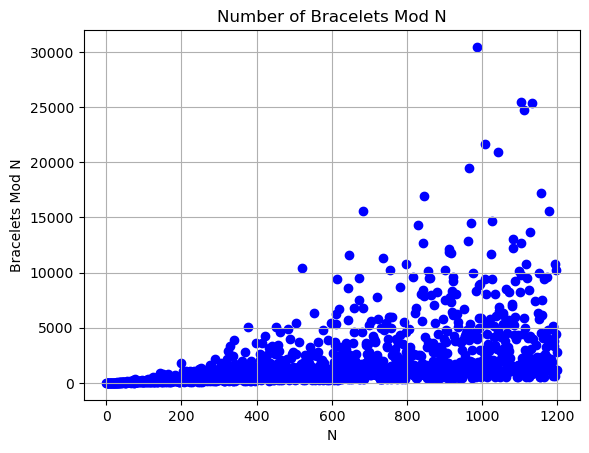

In [24]:
#Plotting Bracelets mod n against n:
m= 1200
counter_list = Bracelets_mod_n_list(m)


x = np.arange(0,m) 
y = counter_list  

# Plotting the graph
plt.scatter(x, y, marker='o', color='b')

# Adding labels and a title
plt.xlabel('N')
plt.ylabel('Bracelets Mod N')
plt.title('Number of Bracelets Mod N')



# Display the plot
plt.grid(True) 
plt.show()


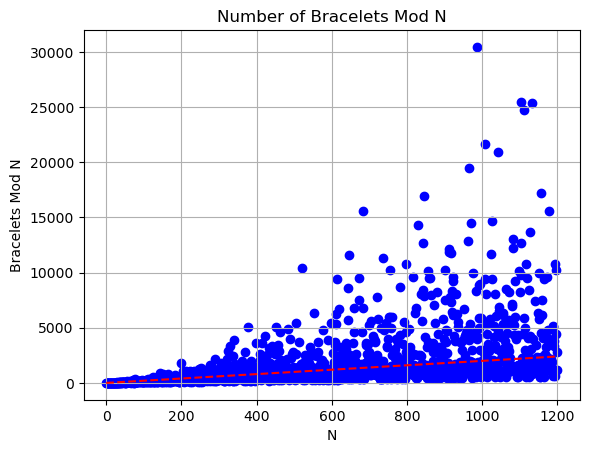

In [25]:
def func_linear(x): return 2*x #I tried a few functions in a seperate file and 2x worked the best
x = np.arange(0,m) 
y = counter_list  

# Plotting the graph
plt.scatter(x, y, marker='o', color='b')
plt.plot(x, func_linear(x), label='Linear', linestyle='--', color = 'r')

# Adding labels and a title
plt.xlabel('N')
plt.ylabel('Bracelets Mod N')
plt.title('Number of Bracelets Mod N')



# Display the plot
plt.grid(True) 
plt.show()



In [26]:
#Another guess I had is that worked somehwat that this may follow the famous pi(x) distribution from the prime number theorem, this also worked somewhat but appeared to be a slight undershoot.

C:\Users\jamie\AppData\Local\Temp\ipykernel_20284\2253513779.py:2: RuntimeWarning: divide by zero encountered in divide
  def func_pi(x): return x+1/np.log(x+1) #including +1 so no log(0) error


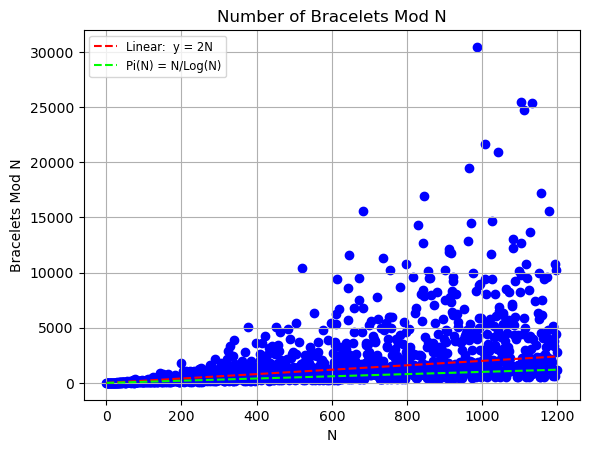

In [27]:
#just for completeeness showing here it is vs N/logN
def func_pi(x): return x+1/np.log(x+1) #including +1 so no log(0) error
x = np.arange(0,m) 
y = counter_list 


# Plotting the graph
plt.scatter(x, y, marker='o', color='b')
plt.plot(x, func_linear(x), label='Linear:  y = 2N', linestyle='--', color = 'r')
plt.plot(x, func_pi(x), label='Pi(N) = N/Log(N)', linestyle='--', color = 'lime')

# Adding labels and a title
plt.xlabel('N')
plt.ylabel('Bracelets Mod N')
plt.title('Number of Bracelets Mod N')



# Display the plot
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)  
plt.show()



C:\Users\jamie\AppData\Local\Temp\ipykernel_20284\2736485602.py:2: RuntimeWarning: divide by zero encountered in divide
  def func_pi(x): return x+1/np.log(x+1) #including +1 so no log(0) error
C:\Users\jamie\AppData\Local\Temp\ipykernel_20284\2736485602.py:3: RuntimeWarning: divide by zero encountered in log
  def func_xlogx(x): return x*np.log(x) #another function to try
C:\Users\jamie\AppData\Local\Temp\ipykernel_20284\2736485602.py:3: RuntimeWarning: invalid value encountered in multiply
  def func_xlogx(x): return x*np.log(x) #another function to try


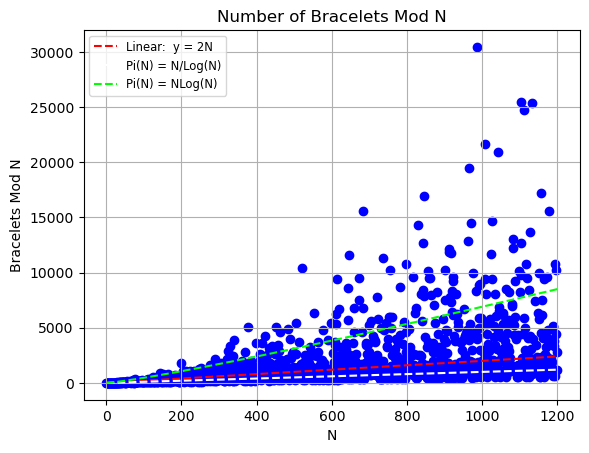

In [28]:
#just for completeeness showing here it is vs N/logN
def func_pi(x): return x+1/np.log(x+1) #including +1 so no log(0) error
def func_xlogx(x): return x*np.log(x) #another function to try
x = np.arange(0,m) 
y = counter_list 


# Plotting the graph
plt.scatter(x, y, marker='o', color='b')
plt.plot(x, func_linear(x), label='Linear:  y = 2N', linestyle='--', color = 'r')
plt.plot(x, func_pi(x), label='Pi(N) = N/Log(N)', linestyle='--', color = 'w')
plt.plot(x, func_xlogx(x), label='Pi(N) = NLog(N)', linestyle='--', color = 'lime')

# Adding labels and a title
plt.xlabel('N')
plt.ylabel('Bracelets Mod N')
plt.title('Number of Bracelets Mod N')



# Display the plot
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)  
plt.show()




In [29]:
#interestingly, some numbers N which are sparcely populated have many more # bracelets than usual, which N are they?

In [30]:
Bracelets_mod_n_list(100)

array([  0.,   1.,   2.,   2.,   4.,   3.,   4.,   4.,   8.,   5.,   6.,
        14.,  10.,   7.,   8.,  12.,  16.,   9.,  16.,  22.,  16.,  29.,
        28.,  12.,  30.,  13.,  14.,  14.,  22.,  63.,  24.,  34.,  32.,
        39.,  34.,  30.,  58.,  19.,  86.,  32.,  52.,  43.,  58.,  22.,
        78.,  39.,  46.,  70., 102.,  25.,  26.,  42.,  40.,  27.,  52.,
       160.,  74.,  63., 126.,  62.,  70.,  63., 134., 104.,  64.,  57.,
        78.,  34., 132., 101.,  60.,  74., 222.,  37.,  38.,  62., 328.,
        89.,  64.,  82., 124.,  41.,  86.,  42., 172.,  75.,  44., 184.,
       178., 181., 132.,  82., 180.,  99., 140., 104., 246.,  49.,  50.,
       114.])

In [31]:
#we see the 328 jumps out as quite large 

In [32]:
Bracelets_mod_n_list(100)[87] #mod 87 there are 184 bracelets

184.0

In [33]:
Bracelets_mod_n_list(150)

array([  0.,   1.,   2.,   2.,   4.,   3.,   4.,   4.,   8.,   5.,   6.,
        14.,  10.,   7.,   8.,  12.,  16.,   9.,  16.,  22.,  16.,  29.,
        28.,  12.,  30.,  13.,  14.,  14.,  22.,  63.,  24.,  34.,  32.,
        39.,  34.,  30.,  58.,  19.,  86.,  32.,  52.,  43.,  58.,  22.,
        78.,  39.,  46.,  70., 102.,  25.,  26.,  42.,  40.,  27.,  52.,
       160.,  74.,  63., 126.,  62.,  70.,  63., 134., 104.,  64.,  57.,
        78.,  34., 132., 101.,  60.,  74., 222.,  37.,  38.,  62., 328.,
        89.,  64.,  82., 124.,  41.,  86.,  42., 172.,  75.,  44., 184.,
       178., 181., 132.,  82., 180.,  99., 140., 104., 246.,  49.,  50.,
       114.,  76., 207., 164.,  52., 140., 255., 106., 160., 202., 111.,
       320.,  92., 274., 169., 248., 102., 368., 107., 124., 108., 250.,
       147., 250., 380., 520.,  63., 358.,  64., 128., 191., 114., 134.,
       228., 145.,  68., 120., 520.,  69., 400., 424., 178., 623., 148.,
       164., 870., 305.,  74., 218., 112., 151.])

In [34]:
#520, 623 and 870 jump out as quite large

In [35]:
Bracelets_mod_n_list(150)[144] #144 is 12 squared

870.0

In [36]:
Bracelets_mod_n_list(150)[141] #141 isnt prime

623.0

In [37]:
Bracelets_mod_n_list(150)[136] #not prime

520.0

In [38]:
Bracelets_mod_n_list(200)

array([0.00e+00, 1.00e+00, 2.00e+00, 2.00e+00, 4.00e+00, 3.00e+00,
       4.00e+00, 4.00e+00, 8.00e+00, 5.00e+00, 6.00e+00, 1.40e+01,
       1.00e+01, 7.00e+00, 8.00e+00, 1.20e+01, 1.60e+01, 9.00e+00,
       1.60e+01, 2.20e+01, 1.60e+01, 2.90e+01, 2.80e+01, 1.20e+01,
       3.00e+01, 1.30e+01, 1.40e+01, 1.40e+01, 2.20e+01, 6.30e+01,
       2.40e+01, 3.40e+01, 3.20e+01, 3.90e+01, 3.40e+01, 3.00e+01,
       5.80e+01, 1.90e+01, 8.60e+01, 3.20e+01, 5.20e+01, 4.30e+01,
       5.80e+01, 2.20e+01, 7.80e+01, 3.90e+01, 4.60e+01, 7.00e+01,
       1.02e+02, 2.50e+01, 2.60e+01, 4.20e+01, 4.00e+01, 2.70e+01,
       5.20e+01, 1.60e+02, 7.40e+01, 6.30e+01, 1.26e+02, 6.20e+01,
       7.00e+01, 6.30e+01, 1.34e+02, 1.04e+02, 6.40e+01, 5.70e+01,
       7.80e+01, 3.40e+01, 1.32e+02, 1.01e+02, 6.00e+01, 7.40e+01,
       2.22e+02, 3.70e+01, 3.80e+01, 6.20e+01, 3.28e+02, 8.90e+01,
       6.40e+01, 8.20e+01, 1.24e+02, 4.10e+01, 8.60e+01, 4.20e+01,
       1.72e+02, 7.50e+01, 4.40e+01, 1.84e+02, 1.78e+02, 1.81e

In [39]:
#1810 jumos out as large!

In [40]:
Bracelets_mod_n_list(200)[199] #but 199 is prime? so it isnt just primes

1810.0

In [41]:
#seems hard to predict which N cause number of braceelets mod N to be large

In [42]:
Bracelets_mod_n_list(250)

array([0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
       4.000e+00, 4.000e+00, 8.000e+00, 5.000e+00, 6.000e+00, 1.400e+01,
       1.000e+01, 7.000e+00, 8.000e+00, 1.200e+01, 1.600e+01, 9.000e+00,
       1.600e+01, 2.200e+01, 1.600e+01, 2.900e+01, 2.800e+01, 1.200e+01,
       3.000e+01, 1.300e+01, 1.400e+01, 1.400e+01, 2.200e+01, 6.300e+01,
       2.400e+01, 3.400e+01, 3.200e+01, 3.900e+01, 3.400e+01, 3.000e+01,
       5.800e+01, 1.900e+01, 8.600e+01, 3.200e+01, 5.200e+01, 4.300e+01,
       5.800e+01, 2.200e+01, 7.800e+01, 3.900e+01, 4.600e+01, 7.000e+01,
       1.020e+02, 2.500e+01, 2.600e+01, 4.200e+01, 4.000e+01, 2.700e+01,
       5.200e+01, 1.600e+02, 7.400e+01, 6.300e+01, 1.260e+02, 6.200e+01,
       7.000e+01, 6.300e+01, 1.340e+02, 1.040e+02, 6.400e+01, 5.700e+01,
       7.800e+01, 3.400e+01, 1.320e+02, 1.010e+02, 6.000e+01, 7.400e+01,
       2.220e+02, 3.700e+01, 3.800e+01, 6.200e+01, 3.280e+02, 8.900e+01,
       6.400e+01, 8.200e+01, 1.240e+02, 4.100e+01, 

In [43]:
#nothing massively large betweem 200 and 250 - ie nothing over the 1800 seen before

In [44]:
Bracelets_mod_n_list(300)

array([0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
       4.000e+00, 4.000e+00, 8.000e+00, 5.000e+00, 6.000e+00, 1.400e+01,
       1.000e+01, 7.000e+00, 8.000e+00, 1.200e+01, 1.600e+01, 9.000e+00,
       1.600e+01, 2.200e+01, 1.600e+01, 2.900e+01, 2.800e+01, 1.200e+01,
       3.000e+01, 1.300e+01, 1.400e+01, 1.400e+01, 2.200e+01, 6.300e+01,
       2.400e+01, 3.400e+01, 3.200e+01, 3.900e+01, 3.400e+01, 3.000e+01,
       5.800e+01, 1.900e+01, 8.600e+01, 3.200e+01, 5.200e+01, 4.300e+01,
       5.800e+01, 2.200e+01, 7.800e+01, 3.900e+01, 4.600e+01, 7.000e+01,
       1.020e+02, 2.500e+01, 2.600e+01, 4.200e+01, 4.000e+01, 2.700e+01,
       5.200e+01, 1.600e+02, 7.400e+01, 6.300e+01, 1.260e+02, 6.200e+01,
       7.000e+01, 6.300e+01, 1.340e+02, 1.040e+02, 6.400e+01, 5.700e+01,
       7.800e+01, 3.400e+01, 1.320e+02, 1.010e+02, 6.000e+01, 7.400e+01,
       2.220e+02, 3.700e+01, 3.800e+01, 6.200e+01, 3.280e+02, 8.900e+01,
       6.400e+01, 8.200e+01, 1.240e+02, 4.100e+01, 

In [45]:
y[281] #281 is prime

1411.0

In [46]:
#2166 and 1411 fairly large is quite large

In [47]:
Bracelets_mod_n_list(300)[288] #note 288 is again not prime

2166.0

In [48]:
X = Bracelets_mod_n_list(350)
print(X)

[0.000e+00 1.000e+00 2.000e+00 2.000e+00 4.000e+00 3.000e+00 4.000e+00
 4.000e+00 8.000e+00 5.000e+00 6.000e+00 1.400e+01 1.000e+01 7.000e+00
 8.000e+00 1.200e+01 1.600e+01 9.000e+00 1.600e+01 2.200e+01 1.600e+01
 2.900e+01 2.800e+01 1.200e+01 3.000e+01 1.300e+01 1.400e+01 1.400e+01
 2.200e+01 6.300e+01 2.400e+01 3.400e+01 3.200e+01 3.900e+01 3.400e+01
 3.000e+01 5.800e+01 1.900e+01 8.600e+01 3.200e+01 5.200e+01 4.300e+01
 5.800e+01 2.200e+01 7.800e+01 3.900e+01 4.600e+01 7.000e+01 1.020e+02
 2.500e+01 2.600e+01 4.200e+01 4.000e+01 2.700e+01 5.200e+01 1.600e+02
 7.400e+01 6.300e+01 1.260e+02 6.200e+01 7.000e+01 6.300e+01 1.340e+02
 1.040e+02 6.400e+01 5.700e+01 7.800e+01 3.400e+01 1.320e+02 1.010e+02
 6.000e+01 7.400e+01 2.220e+02 3.700e+01 3.800e+01 6.200e+01 3.280e+02
 8.900e+01 6.400e+01 8.200e+01 1.240e+02 4.100e+01 8.600e+01 4.200e+01
 1.720e+02 7.500e+01 4.400e+01 1.840e+02 1.780e+02 1.810e+02 1.320e+02
 8.200e+01 1.800e+02 9.900e+01 1.400e+02 1.040e+02 2.460e+02 4.900e+01
 5.000

In [49]:
#3385 and #3897 are large numbers of bracelets

In [50]:
X[341] #is not prime

3897.0

In [51]:
X[329] #329 is not prime

3385.0

In [52]:
#most of the numbers N st number of bracelets mod N is large seem to be composite, but only at a rate that most of these numbers looked at (ie between 300 and 350 here) are composite anyway -
#ie it appears to be independent of whether N is composite or prime

In [53]:
print(y)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.0245e+04 1.2040e+03 2.7640e+03]


In [54]:
y[690]

3588.0

In [55]:
print([y[i] for i in range(600,700)])

[1350.0, 603.0, 1058.0, 1094.0, 2746.0, 1877.0, 1232.0, 304.0, 3716.0, 3451.0, 6206.0, 1732.0, 5306.0, 307.0, 2144.0, 9462.0, 1828.0, 309.0, 922.0, 1864.0, 6676.0, 3281.0, 628.0, 2344.0, 2490.0, 313.0, 314.0, 1542.0, 472.0, 603.0, 3210.0, 634.0, 3212.0, 3187.0, 634.0, 570.0, 2090.0, 3631.0, 3040.0, 654.0, 1132.0, 643.0, 5728.0, 322.0, 8646.0, 1713.0, 11638.0, 324.0, 2526.0, 1517.0, 614.0, 1854.0, 490.0, 327.0, 2204.0, 1720.0, 3628.0, 617.0, 6770.0, 662.0, 4608.0, 1987.0, 2000.0, 1032.0, 2632.0, 1211.0, 1060.0, 1394.0, 1332.0, 1001.0, 600.0, 7516.0, 9480.0, 337.0, 338.0, 650.0, 508.0, 1015.0, 1684.0, 628.0, 4660.0, 1019.0, 15560.0, 342.0, 6782.0, 615.0, 344.0, 1384.0, 1822.0, 657.0, 3588.0, 3466.0, 1380.0, 2589.0, 1040.0, 2106.0, 3514.0, 1395.0, 2810.0, 5222.0]


In [56]:
y[682] #682 is not prime

15560.0

In [57]:
#15560 bracelets is massive

In [58]:
y[646] #not prime again

11638.0

In [59]:
#massive number of bracelets

In [60]:
print([y[i] for i in range(950,1000)])

[2030.0, 792.0, 6730.0, 4285.0, 4280.0, 2500.0, 1446.0, 4545.0, 964.0, 888.0, 4786.0, 1027.0, 914.0, 12884.0, 3876.0, 867.0, 19462.0, 5314.0, 2028.0, 14503.0, 870.0, 974.0, 1930.0, 2947.0, 488.0, 1532.0, 9936.0, 1465.0, 1462.0, 4514.0, 1312.0, 4515.0, 988.0, 492.0, 8346.0, 885.0, 3998.0, 30458.0, 4204.0, 1881.0, 8846.0, 4966.0, 5924.0, 2993.0, 1018.0, 9012.0, 5914.0, 499.0, 2006.0, 968.0]


In [61]:
#note 14,500, 12,884, and 30,458!
print(y[963]) # divisible by 3
print(y[966]) # divisible by 2
print(y[987]) #divisible by 3
print(y[997]) #997 prime - i wonder if primes have less bracelets

12884.0
19462.0
30458.0
499.0


In [62]:
y[911] #911 is prime - 

11870.0

In [63]:
#11,870 is relatively large - again prime N can have large number of Bracelets, pattern doesnt seem to relate to whether or not N is prime even as N grows

In [64]:
#especially noting there are fewer primes N as N grows.

In [65]:
#how about powers of 2?
print(y[2])
print(y[4])
print(y[8])
print(y[16])
print(y[32])
print(y[64])
print(y[128])
print(y[256])
print(y[512])
print(y[1024])

2.0
4.0
8.0
16.0
32.0
64.0
128.0
256.0
512.0
1024.0


In [66]:
#AHA!!! That cant be a coincedence!

In [67]:
#Powers of 3?
print(y[3])
print(y[9])
print(y[27])
print(y[81])
print(y[243])
print(y[729])

2.0
5.0
14.0
41.0
122.0
365.0


In [68]:
#AHA! double and minus 1 gives N

In [69]:
#if f(N) is number of bracelets mod N then f(2^k) appears to = 2^k and f(3^k) = (3^k + 1)/2

In [70]:
#Powers of 10? powers of primes?
print(y[5])
print(y[25])
print(y[125])
print(y[625])

3.0
13.0
63.0
313.0


In [71]:
#AHA! follows (N+1)/2

In [72]:
#lets try 7
print(y[7])
print(y[49])
print(y[343])

4.0
25.0
172.0


In [73]:
#again N+1 / 2

In [74]:
print(y[10])
print(y[100])
print(y[1000])

6.0
76.0
1372.0


In [75]:
#no clear pattern

In [76]:
print(y[11])
print(y[121])

14.0
147.0


In [77]:
#no clear pattern
print(y[13])
print(y[169])

7.0
85.0
